# Introduction

The main function of this module is to convert recored peak intensities to particle sizes and create a [sizedistribution instance](./sizedistribution.ipynb).

# Imports

In [1]:
from atmPy.aerosols.instruments.POPS import peaks,calibration
import matplotlib.pylab as plt
from atmPy.tools import plt_tools
import numpy as np

In [2]:
%matplotlib inline
plt_tools.setRcParams(plt)

# Reading a Peak file

Different file formats emerged during the development of POPS, which resulted in different functions with various optional parameters to read the files. Hopefully you will only need to use the following one which emerged in fall 2015.

In [3]:
filename = './data/POPS_Peak.bin'
filename = "/Users/wgblumbe/POPS/Thai_data/2019.03.27/0700/POPS/Peak_20190327x001.b"
measurement = peaks.read_binary(filename, verbose=True)


_read_PeakFile_Binary (version = BBB)
_bbb_binary2array ... done
/Users/wgblumbe/POPS/Thai_data/2019.03.27/0700/POPS/Peak_20190327x001.b
_PeakFileArray2dataFrame ... done


# Sizing

To convert peak heights to particle sizes we first have to load a calibration file. Further information on calibration can be found [here](./instruments_POPS_calibration.ipynb).

In [4]:
cal = calibration.read_csv('./data/POPS_calibration.csv')

Then we apply this calibration which adds an extra column to the data set containg the particle size.

In [5]:
measurement.apply_calibration(cal)

/Users/wgblumbe/POPS/atm-py/atmPy/aerosols/instruments/POPS/calibration.py:360: RuntimeWarning: divide by zero encountered in log10
  cal_function = lambda amp: 10**us(np.log10(amp))
/Users/wgblumbe/POPS/atm-py/atmPy/aerosols/instruments/POPS/calibration.py:360: RuntimeWarning: overflow encountered in power
  cal_function = lambda amp: 10**us(np.log10(amp))


In [6]:
measurement.data.index.values

array(['2019-03-27T00:00:41.313446999', '2019-03-27T00:00:41.313446999',
       '2019-03-27T00:00:41.313446999', ...,
       '1970-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

# Convert to size distribution 

Either use use the default bins or define your own.

In [7]:
bins = np.logspace(np.log10(120), np.log10(3000), 100)
sd = measurement.peak2sizedistribution(bins = bins)

Show the data: (array([0, 1, 3, 4]),)                                   Amplitude           Max  Width  \
Time_UTC                                                           
2019-03-27 00:00:41.313446999  3.600000e+01  5.000000e+00   5918   
2019-03-27 00:00:41.313446999  5.000000e+00  1.579110e+05     29   
2019-03-27 00:00:41.313446999  8.736700e+04  3.800000e+01      5   
2019-03-27 00:00:41.313446999  2.800000e+01  5.000000e+00  -7828   
2019-03-27 00:00:41.313446999  5.000000e+00  2.767680e+05   1693   
...                                     ...           ...    ...   
1970-01-01 00:00:00.000000000  2.459079e+09  2.459079e+09      0   
1970-01-01 00:00:00.000000000  2.459079e+09  2.459079e+09      0   
1970-01-01 00:00:00.000000000  2.459079e+09  2.459079e+09      0   
1970-01-01 00:00:00.000000000  2.459079e+09  2.459079e+09      0   
1970-01-01 00:00:00.000000000  2.459079e+09  2.459079e+09      0   

                                  Saturated  Masked      Diameter  
Time_UTC 

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
sd.plot()

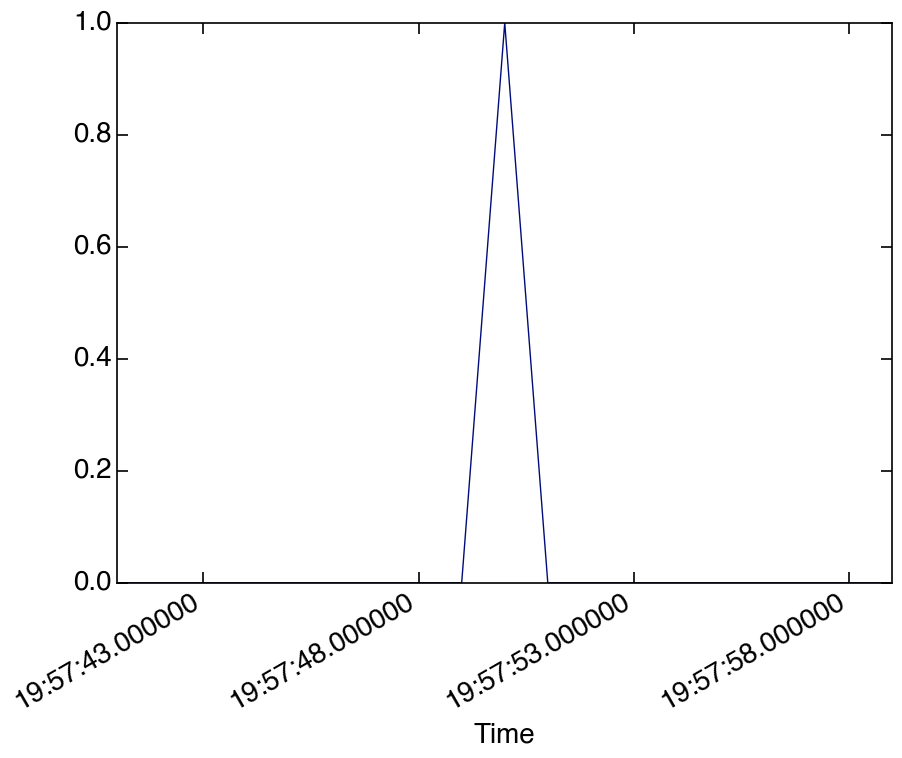

In [8]:
sd.particle_number_concentration_outside_range.plot()

# normalize to flow rate

You probably want to normalize the particle rates to particle concentrations by dividing by the flow rate. It is important not to apply operations solely to the data container. Instead perform the opperation on the entire sizedistribution instance. 

In [9]:
sd /= 3

(<matplotlib.figure.Figure at 0x117203978>,
 <matplotlib.colorbar.Colorbar at 0x10d6680b8>)

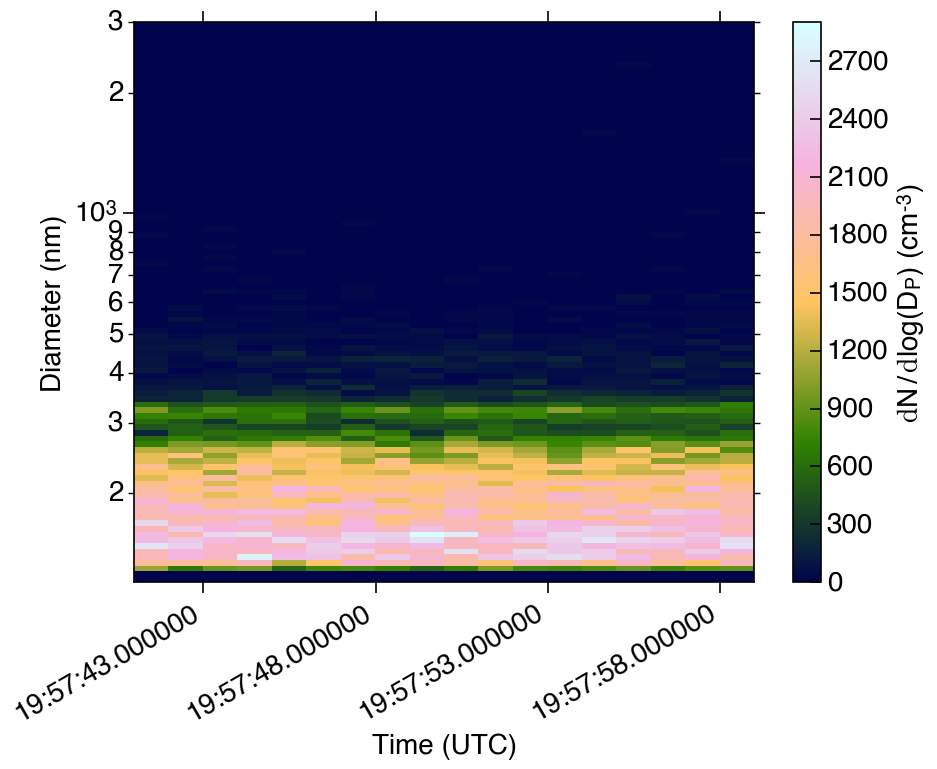

In [10]:
sd.plot()

In [11]:
sd.particle_number_concentration_outside_range

                     # too big
2015-10-09 19:57:41   0.000000
2015-10-09 19:57:42   0.000000
2015-10-09 19:57:43   0.000000
2015-10-09 19:57:44   0.000000
2015-10-09 19:57:45   0.000000
2015-10-09 19:57:46   0.000000
2015-10-09 19:57:47   0.000000
2015-10-09 19:57:48   0.000000
2015-10-09 19:57:49   0.000000
2015-10-09 19:57:50   0.333333
2015-10-09 19:57:51   0.000000
2015-10-09 19:57:52   0.000000
2015-10-09 19:57:53   0.000000
2015-10-09 19:57:54   0.000000
2015-10-09 19:57:55   0.000000
2015-10-09 19:57:56   0.000000
2015-10-09 19:57:57   0.000000
2015-10-09 19:57:58   0.000000
2015-10-09 19:57:59   0.000000

Done! Now you can do what ever you can do with a sizedistribution instance ([see here](./sizedistribution.ipynb)). E.g. save it, or plot it

In [9]:
sd.save_csv('./data/POPS_Peak.bin.dist')